# Tarea #3

In [329]:
import pandas as pd
import numpy as np
import io
import os
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import ternary

import statsmodels.api as sm

In [7]:
def read_list_csv(carpeta, formato='.csv'):
    list_files = []
    for item in carpeta.rglob('*'):
        if item.is_file():
            if str(item).endswith(formato):
                list_files += ['.\\' + str(item)]

    return list_files

ruta_admision = Path('./datos_ext/admision')
ruta_inscripcion = Path('./datos_ext/inscripcion')
ruta_matricula = Path('./datos_ext/matricula')
ruta_postulacion = Path('./datos_ext/postulacion')

list_files_admision = read_list_csv(ruta_admision)
list_files_inscripcion = read_list_csv(ruta_inscripcion)
list_files_matricula = read_list_csv(ruta_matricula)
list_files_postulacion = read_list_csv(ruta_postulacion)

list_files_admision_xlsx = read_list_csv(ruta_admision, formato='.xlsx')
list_files_inscripcion_xlsx = read_list_csv(ruta_inscripcion, formato='.xlsx')
list_files_matricula_xlsx = read_list_csv(ruta_matricula, formato='.xlsx')
list_files_postulacion_xlsx = read_list_csv(ruta_postulacion, formato='.xlsx')

In [8]:
list_admision_2014_2023 = list_files_admision[10:-2]
cols_admision_2014_2023 = [
    ['ID_aux', 'PROM_NOTAS', 'PTJE_NEM', 'PTJE_RANKING', 'GRUPO_DEPENDENCIA'],
    ['ID_aux', 'PROM_NOTAS', 'PTJE_NEM', 'PTJE_RANKING', 'GRUPO_DEPENDENCIA'],
    ['ID_aux', 'PROM_NOTAS', 'PTJE_NEM', 'PTJE_RANKING', 'GRUPO_DEPENDENCIA'],
    ['ID_aux', 'PROM_NOTAS', 'PTJE_NEM', 'PTJE_RANKING', 'GRUPO_DEPENDENCIA'],
    ['ID_aux', 'PROMEDIO_NOTAS', 'PTJE_NEM', 'PTJE_RANKING', 'GRUPO_DEPENDENCIA'],
    ['ID_aux', 'PROMEDIO_NOTAS', 'PTJE_NEM', 'PTJE_RANKING', 'GRUPO_DEPENDENCIA'],
    ['ID_aux', 'PROMEDIO_NOTAS', 'PTJE_NEM', 'PTJE_RANKING', 'GRUPO_DEPENDENCIA'],
    ['ID_aux', 'PROMEDIO_NOTAS', 'PTJE_NEM', 'PTJE_RANKING', 'GRUPO_DEPENDENCIA'],
    ['ID_aux', 'PROMEDIO_NOTAS', 'PTJE_NEM', 'PTJE_RANKING', 'GRUPO_DEPENDENCIA'],
    ['ID_aux', 'PROMEDIO_NOTAS', 'PTJE_NEM', 'PTJE_RANKING', 'GRUPO_DEPENDENCIA']  
]

list_files_matricula_2014_2023 = list_files_matricula[10:]
cols_matricula_2014_2023 = [
    ['ID_aux', 'CODIGO_UNIV', 'CODIGO', 'PTJE_POND'],  
    ['ID_aux', 'CODIGO_UNIV', 'CODIGO', 'PTJE_POND'],  
    ['ID_aux', 'CODIGO_UNIV', 'CODIGO', 'PTJE_POND'],  
    ['ID_aux', 'CODIGO_UNIV', 'CODIGO', 'PTJE_POND'],  
    ['ID_aux', 'CODIGO_UNIV', 'CODIGO', 'PTJE_POND'],  
    ['ID_aux', 'CODIGO_UNIV', 'CODIGO', 'PTJE_POND'],  
    ['ID_aux', 'CODIGO_UNIV', 'CODIGO', 'PTJE_POND'],  
    ['ID_aux', 'CODIGO_UNIV', 'CODIGO', 'PTJE_POND'],  
    ['ID_aux', 'CODIGO_UNIV', 'CODIGO', 'PTJE_POND'],  
    ['ID_aux', 'CODIGO_UNIV', 'CODIGO', 'PTJE_POND'],  
]

list_files_matricula_xlsx_2014_2023 = list_files_matricula_xlsx[9:]
list_sheet_matricula = [
    'Anexo - OfertaAcadémica_RegBEA',
    'Anexo - OfertaAcadémica_RegBEA',
    'Anexo - OfertaAcadémica_RegBEA',
    'Anexo - OfertaAcadémica_RegBEA',
    'Anexo - OfertaAcadémica_RegBEA',
    'Anexo - OfertaAcadémica_RegBEA',
    'Anexo - OfertaAcadémica_RegBEA',
    'Anexo - OfertaAcadémica_RegBEA',
    'Anexo - OfertaAcadémica_RegBEA',
    'Anexo - Oferta académica'
]

cols_matricula_xlsx_2014_2023 = [
    ['CODIGO', 'UNIVERSIDAD'],
    ['CODIGO', 'UNIVERSIDAD'],
    ['CODIGO', 'UNIVERSIDAD'],
    ['CODIGO', 'UNIVERSIDAD'],
    ['CODIGO_CARRERA', 'NOMBRE_UNIVERSIDAD'],
    ['CODIGO_CARRERA', 'NOMBRE_UNIVERSIDAD'],
    ['CODIGO', 'UNIVERSIDAD'],
    ['CODIGO', 'UNIVERSIDAD'],
    ['CODIGO', 'UNIVERSIDAD'],
    ['CODIGO', 'UNIVERSIDAD']
]

In [262]:
cols_admision = ['ID_aux', 'PROMEDIO_NOTAS', 'PTJE_NEM', 'PTJE_RANKING', 'GRUPO_DEPENDENCIA', 'AÑO']
cols_matricula = ['ID_aux', 'CODIGO_UNIV', 'CODIGO', 'PTJE_POND', 'AÑO', 'UNIVERSIDAD']
df_admision = pd.DataFrame(columns=cols_admision)
df_matricula = pd.DataFrame(columns=cols_matricula)
gdep_map = {1: 'Particular pagado', 2: 'Particular subvencionado', 3: 'Municipal'}

for k in range(len(cols_admision_2014_2023)):
    df = pd.read_csv(list_admision_2014_2023[k], sep=';', low_memory=False)[cols_admision_2014_2023[k]]
    df.columns = cols_admision[:-1]
    df['AÑO'] = 2014 + k
    df_admision = pd.concat([df_admision, df])

    df = pd.read_csv(list_files_matricula_2014_2023[k], sep=';', low_memory=False)[cols_matricula_2014_2023[k]]
    df.columns = cols_matricula[:-2]
    df['AÑO'] = 2014 + k

    df_aux = pd.read_excel(list_files_matricula_xlsx_2014_2023[k], sheet_name=list_sheet_matricula[k])[cols_matricula_xlsx_2014_2023[k]]
    df_aux.columns = ['CODIGO', 'UNIVERSIDAD']
    universidad_map = {df_aux.drop_duplicates('CODIGO').iloc[i]['CODIGO']:df_aux.drop_duplicates('CODIGO').iloc[i]['UNIVERSIDAD']  for i in range(df_aux.drop_duplicates('CODIGO').shape[0])}
    df['UNIVERSIDAD'] = df['CODIGO'].map(universidad_map)
    df = df.dropna()

    df_matricula = pd.concat([df_matricula, df])

df_admision_matricula = df_matricula.merge(df_admision, how='left', on=['ID_aux', 'AÑO'])
df_admision_matricula = df_admision_matricula[~df_admision_matricula['GRUPO_DEPENDENCIA'].isna()]
df_admision_matricula = df_admision_matricula[df_admision_matricula['GRUPO_DEPENDENCIA']>0]
df_admision_matricula = df_admision_matricula[df_admision_matricula['GRUPO_DEPENDENCIA']<4]
df_admision_matricula['GRUPO_DEPENDENCIA'] = df_admision_matricula['GRUPO_DEPENDENCIA'].astype(int)
df_admision_matricula['GRUPO_DEPENDENCIA'] = df_admision_matricula['GRUPO_DEPENDENCIA'].map(gdep_map)
df_admision_matricula['Particular pagado'] = (df_admision_matricula['GRUPO_DEPENDENCIA']=='Particular pagado')*1
df_admision_matricula['Municipal'] = (df_admision_matricula['GRUPO_DEPENDENCIA']=='Municipal')*1
df_admision_matricula['Particular subvencionado'] = (df_admision_matricula['GRUPO_DEPENDENCIA']=='Particular subvencionado')*1
df_admision_matricula['PTJE_POND'] = df_admision_matricula['PTJE_POND'].astype(str).str.replace(',', '.').astype(float)
df_admision_matricula['PROMEDIO_NOTAS'] = df_admision_matricula['PROMEDIO_NOTAS'].astype(str).str.replace(',', '.').astype(float)
df_admision_matricula['PTJE_NEM'] = df_admision_matricula['PTJE_NEM'].astype(str).str.replace(',', '.').astype(float)
df_admision_matricula['PTJE_RANKING'] = df_admision_matricula['PTJE_RANKING'].astype(str).str.replace(',', '.').astype(float)

df_admision_matricula['UNIVERSIDAD'] = df_admision_matricula['UNIVERSIDAD']\
    .apply(lambda x: 'UNIVERSIDAD ADOLFO IBAÑEZ' if x=='UNIVERSIDAD ADOLFO IBAÃ‘EZ' else x)\
    .apply(lambda x: 'UNIVERSIDAD DE LAS AMERICAS' if x=='UNIVERSIDAD DE LAS AMÃ‰RICAS' else x)

df_admision_matricula['PROMEDIO_NOTAS'] = df_admision_matricula['PROMEDIO_NOTAS'].apply(lambda x: x/100 if x>100 else x)
df_admision_matricula = df_admision_matricula[df_admision_matricula['PROMEDIO_NOTAS']>0]

In [263]:
df_admision_matricula

,ID_aux,CODIGO_UNIV,CODIGO,PTJE_POND,AÑO,UNIVERSIDAD,PROMEDIO_NOTAS,PTJE_NEM,PTJE_RANKING,GRUPO_DEPENDENCIA,Particular pagado,Municipal,Particular subvencionado
1,id_3193341220,42,42001,648.00,2014,UNIVERSIDAD ADOLFO IBAÑEZ,6.12,645.0,645.0,Particular pagado,1,0,0
3,id_819608175963,16,16045,683.40,2014,UNIVERSIDAD DE SANTIAGO DE CHILE,6.01,622.0,845.0,Municipal,0,1,0
4,id_784407879445,33,33160,544.10,2014,UNIVERSIDAD DE MAGALLANES,5.69,556.0,596.0,Municipal,0,1,0
6,id_451104575115,13,13041,695.65,2014,UNIVERSIDAD DE CONCEPCION,6.41,704.0,840.0,Municipal,0,1,0
7,id_228102274814,12,12024,631.70,2014,PONTIFICIA UNIVERSIDAD CATOLICA DE CHILE,6.09,639.0,669.0,Particular subvencionado,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
924592,id_8198841548154,32,32012,591.45,2023,UNIVERSIDAD DE LOS LAGOS,5.85,672.0,704.0,Particular subvencionado,0,0,1
924593,id_7666786944704,50,50201,580.50,2023,UNIVERSIDAD SAN SEBASTIAN,5.90,685.0,713.0,Particular subvencionado,0,0,1
924594,id_7666786243268,32,32055,733.50,2023,UNIVERSIDAD DE LOS LAGOS,6.23,780.0,839.0,Municipal,0,1,0
924595,id_7666786649432,51,51185,593.40,2023,UNIVERSIDAD CENTRAL,5.23,488.0,491.0,Municipal,0,1,0


In [454]:
df_admision_matricula_group.sort_values('Municipal')

,AÑO,UNIVERSIDAD,Particular pagado,Municipal,Particular subvencionado,PROMEDIO_NOTAS
137,2018,UNIVERSIDAD ADOLFO IBAÑEZ,0.860177,0.019469,0.120354,6.028012
177,2019,UNIVERSIDAD ADOLFO IBAÑEZ,0.847801,0.024884,0.127315,6.065961
101,2017,UNIVERSIDAD ADOLFO IBAÑEZ,0.837195,0.025550,0.137255,6.037510
302,2022,UNIVERSIDAD ADOLFO IBAÑEZ,0.793081,0.026265,0.180653,6.408322
218,2020,UNIVERSIDAD ADOLFO IBAÑEZ,0.835731,0.028177,0.136091,6.155528
...,...,...,...,...,...,...
324,2022,UNIVERSIDAD DE LOS LAGOS,0.024515,0.520940,0.454545,5.939530
119,2017,UNIVERSIDAD DE LOS LAGOS,0.015686,0.534314,0.450000,5.673020
239,2020,UNIVERSIDAD DE LOS LAGOS,0.025641,0.537512,0.436847,5.722507
198,2019,UNIVERSIDAD DE LOS LAGOS,0.025022,0.537980,0.436997,5.666622


In [437]:
df_admision_matricula_group = df_admision_matricula.groupby(['AÑO', 'UNIVERSIDAD'], as_index=False)[['Particular pagado', 'Municipal', 'Particular subvencionado','PROMEDIO_NOTAS']].mean().sort_values(['UNIVERSIDAD', 'AÑO'])

In [250]:
df_admision_matricula_group['UNIVERSIDAD'].unique()

array(['PONTIFICIA UNIVERSIDAD CATOLICA DE CHILE',
       'PONTIFICIA UNIVERSIDAD CATOLICA DE VALPARAISO',
       'UNIVERSIDAD ACADEMIA DE HUMANISMO CRISTIANO',
       'UNIVERSIDAD ADOLFO IBAÑEZ', 'UNIVERSIDAD ALBERTO HURTADO',
       'UNIVERSIDAD ANDRES BELLO', 'UNIVERSIDAD ARTURO PRAT',
       'UNIVERSIDAD AUSTRAL DE CHILE', 'UNIVERSIDAD AUTONOMA DE CHILE',
       "UNIVERSIDAD BERNARDO O'HIGGINS",
       'UNIVERSIDAD CATOLICA DE LA SANTISIMA CONCEPCION',
       'UNIVERSIDAD CATOLICA DE TEMUCO', 'UNIVERSIDAD CATOLICA DEL MAULE',
       'UNIVERSIDAD CATOLICA DEL NORTE',
       'UNIVERSIDAD CATOLICA SILVA HENRIQUEZ', 'UNIVERSIDAD CENTRAL',
       'UNIVERSIDAD DE ANTOFAGASTA', 'UNIVERSIDAD DE ATACAMA',
       'UNIVERSIDAD DE AYSEN', 'UNIVERSIDAD DE CHILE',
       'UNIVERSIDAD DE CONCEPCION', 'UNIVERSIDAD DE LA FRONTERA',
       'UNIVERSIDAD DE LA SERENA', 'UNIVERSIDAD DE LAS AMERICAS',
       'UNIVERSIDAD DE LOS ANDES', 'UNIVERSIDAD DE LOS LAGOS',
       'UNIVERSIDAD DE MAGALLANES', "UNI

In [305]:
my_gradient = LinearSegmentedColormap.from_list('my_gradient', (
    # Edit this gradient at https://eltos.github.io/gradient/#0:001A47-33.3:004C70-66.6:DDDD00-100:990000
    (0.000, (0.000, 0.102, 0.278)),
    (0.333, (0.000, 0.298, 0.439)),
    (0.666, (0.867, 0.867, 0.000)),
    (1.000, (0.600, 0.000, 0.000))))

gris_null = "#B5B4A6"
my_gradient.set_bad(gris_null)

d:\anaconda3\Lib\site-packages\ternary\plotting.py:148: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(xs, ys, vmin=vmin, vmax=vmax, **kwargs)
d:\anaconda3\Lib\site-packages\ternary\plotting.py:148: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(xs, ys, vmin=vmin, vmax=vmax, **kwargs)


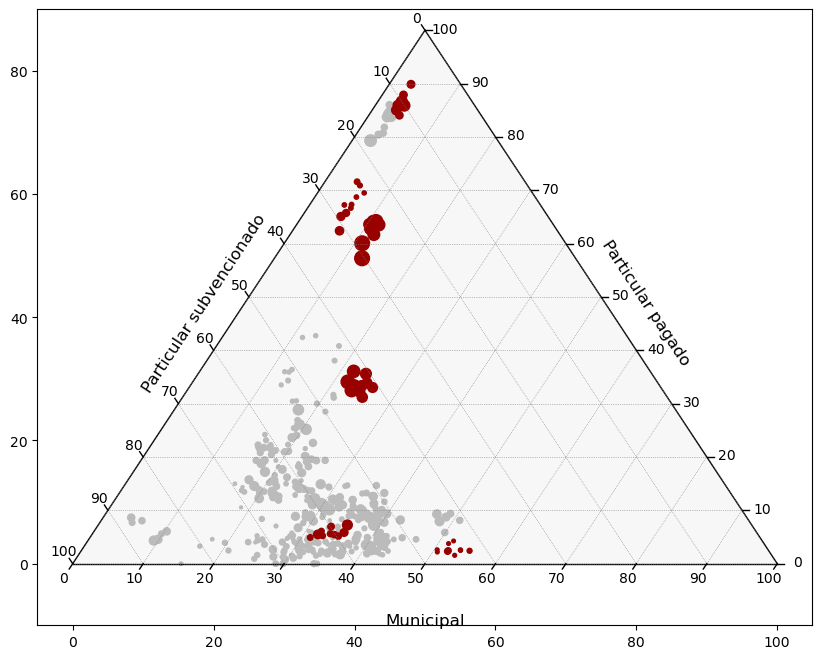

In [479]:
fig, ax = plt.subplots(1,figsize=(10,8))

tax = ternary.TernaryAxesSubplot(ax=ax, scale=100)
tax.boundary(linewidth=1.0)
tax.left_axis_label("Particular subvencionado", fontsize=12)
tax.right_axis_label("Particular pagado", fontsize=12)
tax.bottom_axis_label("Municipal", fontsize=12,offset=-0.0)
tax.gridlines(multiple=10, color="gray")

uni = ['PONTIFICIA UNIVERSIDAD CATOLICA DE CHILE', 'UNIVERSIDAD DE LA FRONTERA', 'UNIVERSIDAD DEL DESARROLLO', 'UNIVERSIDAD DE LOS ANDES', 'UNIVERSIDAD DE LOS LAGOS', 'UNIVERSIDAD DE CHILE']

data = df_admision_matricula_group[~df_admision_matricula_group['UNIVERSIDAD'].isin(uni)][['Municipal', 'Particular pagado', 'Particular subvencionado']]\
    .apply(lambda x: (x['Municipal']*100, x['Particular pagado']*100, x['Particular subvencionado']*100), axis=1).tolist()
data_size = df_admision_matricula_group[~df_admision_matricula_group['UNIVERSIDAD'].isin(uni)]['PROMEDIO_NOTAS']-5

tax.scatter(data, marker='o', color='#BBBBBB', s=np.exp(data_size*3))

data = df_admision_matricula_group[df_admision_matricula_group['UNIVERSIDAD'].isin(uni)][['Municipal', 'Particular pagado', 'Particular subvencionado']]\
    .apply(lambda x: (x['Municipal']*100, x['Particular pagado']*100, x['Particular subvencionado']*100), axis=1).tolist()
data_size = df_admision_matricula_group[df_admision_matricula_group['UNIVERSIDAD'].isin(uni)]['PROMEDIO_NOTAS']-5

tax.scatter(data, marker='o', c='#990000', s=np.exp(data_size*3))
tax.ticks(axis='lbr', linewidth=1, multiple=10,)
#tax.legend()


# Opciones adicionales

# Mostrar el gráfico
#plt.tight_layout()
plt.show()

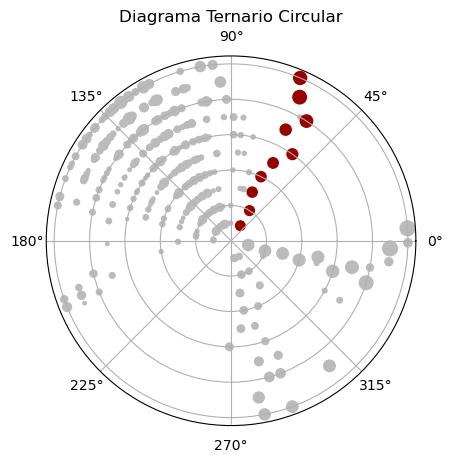

In [464]:
# Datos de ejemplo (A, B, C) que suman 1
#data = df_admision_matricula_group[~df_admision_matricula_group['UNIVERSIDAD'].isin(uni)][['Municipal', 'Particular pagado', 'Particular subvencionado']]\
#    .apply(lambda x: (x['Municipal'], x['Particular pagado'], x['Particular subvencionado']), axis=1).tolist()

# Convertir las tripletas a ángulos (en radianes)
# Puedes asignar a cada eje (A, B, C) un ángulo, por ejemplo: A -> 0°, B -> 120°, C -> 240°
angles = np.array([0, -2*np.pi/3, 4*np.pi/3])

# Función para proyectar en coordenadas polares
def ternary_to_polar(triplet):
    return np.dot(triplet, angles)

def scatter_ternary(data_angles, data_radius, ax, color, size):
    polar_angles = np.apply_along_axis(ternary_to_polar, 1, data_angles)
    ax.scatter(polar_angles, data_radius, color=color, s=size)


# Graficar en coordenadas polares
fig = plt.figure()
ax = fig.add_subplot(111, polar=True)

uni = ['PONTIFICIA UNIVERSIDAD CATOLICA DE CHILE', 'UNIVERSIDAD DE LA FRONTERA', 'UNIVERSIDAD DEL DESARROLLO', 'UNIVERSIDAD DE LOS ANDES', 'UNIVERSIDAD DE LOS LAGOS', 'UNIVERSIDAD DE CHILE']
uni = ['UNIVERSIDAD DE CHILE']

data_angles = df_admision_matricula_group[~df_admision_matricula_group['UNIVERSIDAD'].isin(uni)][['Municipal', 'Particular pagado', 'Particular subvencionado']]\
    .apply(lambda x: (x['Municipal'], x['Particular pagado'], x['Particular subvencionado']), axis=1).tolist()

data_radius = df_admision_matricula_group[~df_admision_matricula_group['UNIVERSIDAD'].isin(uni)]['AÑO']-2013
data_size = df_admision_matricula_group[~df_admision_matricula_group['UNIVERSIDAD'].isin(uni)]['PROMEDIO_NOTAS']-5

scatter_ternary(data_angles, data_radius, ax, color='#bbbbbb', size=np.exp(data_size*3))


data_angles = df_admision_matricula_group[df_admision_matricula_group['UNIVERSIDAD'].isin(uni)][['Municipal', 'Particular pagado', 'Particular subvencionado']]\
    .apply(lambda x: (x['Municipal'], x['Particular pagado'], x['Particular subvencionado']), axis=1).tolist()

data_radius = df_admision_matricula_group[df_admision_matricula_group['UNIVERSIDAD'].isin(uni)]['AÑO']-2013
data_size = df_admision_matricula_group[df_admision_matricula_group['UNIVERSIDAD'].isin(uni)]['PROMEDIO_NOTAS']-5

scatter_ternary(data_angles, data_radius, ax, color='#990000', size=np.exp(data_size*3))


# Configuración estética
ax.set_yticklabels([])  # No mostrar etiquetas de radio
ax.set_title("Diagrama Ternario Circular")

# Mostrar gráfico
plt.show()

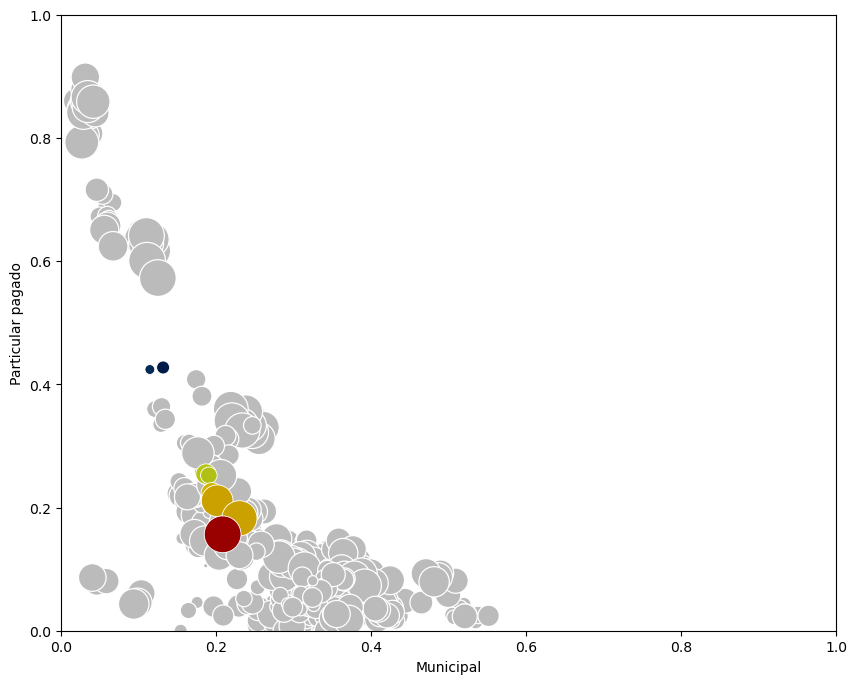

In [315]:
fig, ax = plt.subplots(figsize=(10,8))

uni = ['UNIVERSIDAD FINIS TERRAE']

color_uni = df_admision_matricula_group['UNIVERSIDAD'].isin(uni)
color_size_map = {k: 2*(k-2013) for k in df_admision_matricula_group['AÑO'].unique()}

sns.scatterplot(x=df_admision_matricula_group[~df_admision_matricula_group['UNIVERSIDAD'].isin(uni)]['Municipal'],
                y=df_admision_matricula_group[~df_admision_matricula_group['UNIVERSIDAD'].isin(uni)]['Particular pagado'], 
                color = '#BBBBBB',
                size=df_admision_matricula_group[~df_admision_matricula_group['UNIVERSIDAD'].isin(uni)]['PROMEDIO_NOTAS'],
                sizes=(10, 700),
                legend=False,
                ax=ax
                )

sns.scatterplot(x=df_admision_matricula_group[df_admision_matricula_group['UNIVERSIDAD'].isin(uni)]['Municipal'],
                y=df_admision_matricula_group[df_admision_matricula_group['UNIVERSIDAD'].isin(uni)]['Particular pagado'], 
                hue=df_admision_matricula_group[df_admision_matricula_group['UNIVERSIDAD'].isin(uni)]['Particular subvencionado'],
                palette=my_gradient,
                size=df_admision_matricula_group[df_admision_matricula_group['UNIVERSIDAD'].isin(uni)]['PROMEDIO_NOTAS'],
                sizes=(50, 700),
                legend=False,
                
                ax=ax
                )
ax.set_xlim(0,1)
ax.set_ylim(0,1)
plt.show()

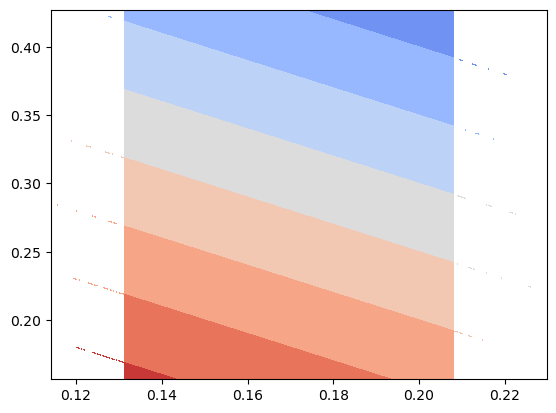

In [313]:
X, Y = np.meshgrid(df_admision_matricula_group[df_admision_matricula_group['UNIVERSIDAD'].isin(uni)]['Municipal'],
                   df_admision_matricula_group[df_admision_matricula_group['UNIVERSIDAD'].isin(uni)]['Particular pagado'])
plt.contourf(X, Y,
             1 - X - Y, 
             cmap="coolwarm")
